In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Helvetica Neue"
plt.rcParams["font.size"] = 14

DATA FILE OF ORIGINAL ENSEMBLE

In [18]:
input_file = "../sketch_map/angles_data.dat"

In [19]:
# Load the data from the file into a NumPy array
data = np.loadtxt(input_file)

# To account for the circular statistics of angular variables, a transformation from 
# the space of dihedral angles {phi(n)} to the metric coordinate space {x(n)=cos phi(n),y(n)=sin phi(n)}
# is performed ()
metric_data = np.column_stack((np.cos(data), np.sin(data)))

# Get the number of columns in the new data set
n_columns = metric_data.shape[1]

# Set the number of components to the number of columns
n_components = n_columns

In [20]:
# Create a PCA object with n_components set to the specified number of components
pca = PCA(n_components=n_components)

# Fit the PCA object to the data
pca.fit(metric_data)

# Get the principal components (eigenvectors) and explained variance ratios (eigenvalues)
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Print the explained variance for each component
print("explained_variance_ratio")
print(explained_variance_ratio)
print("cumulative_explained_variance")
print(cumulative_explained_variance)

# Get the transformed data
transformed_data = pca.transform(metric_data)

# Save the transformed data to a .dat file with columns separated by tabs and 3 decimal places of precision
np.savetxt('transformed_data.dat', transformed_data, delimiter='\t', fmt='%.3f')

explained_variance_ratio
[0.09477579 0.08747723 0.07638741 0.06896847 0.06298045 0.05100491
 0.04468825 0.04144879 0.0371487  0.03533117 0.03392339 0.02843978
 0.02726487 0.02618869 0.02475307 0.02263058 0.02104569 0.0202408
 0.01856323 0.01660104 0.01641982 0.01564344 0.01522664 0.0135611
 0.01093297 0.0100138  0.00913382 0.00867906 0.0082223  0.00817417
 0.00792488 0.00752495 0.00705607 0.00598811 0.00559178 0.00506876
 0.003746   0.00068268 0.00039717 0.00015017]
cumulative_explained_variance
[0.09477579 0.18225302 0.25864043 0.3276089  0.39058935 0.44159426
 0.48628252 0.5277313  0.56488    0.60021116 0.63413455 0.66257433
 0.6898392  0.7160279  0.74078097 0.76341155 0.78445723 0.80469804
 0.82326126 0.8398623  0.85628211 0.87192556 0.8871522  0.9007133
 0.91164628 0.92166008 0.9307939  0.93947296 0.94769526 0.95586942
 0.96379431 0.97131926 0.97837532 0.98436344 0.98995521 0.99502397
 0.99876998 0.99945266 0.99984983 1.        ]


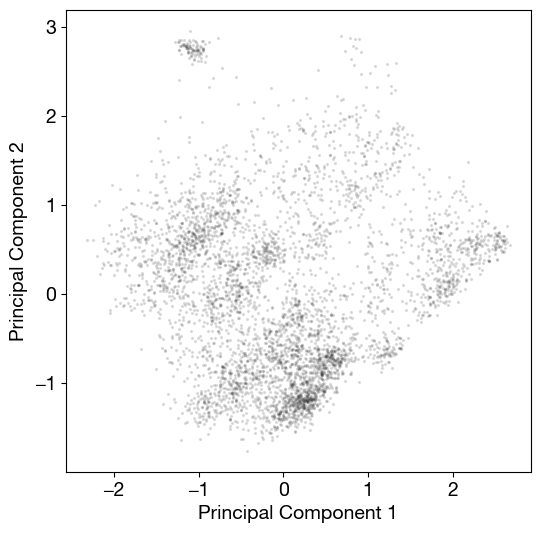

In [21]:
fig = plt.figure(figsize=(6, 6), facecolor='w')

# Plot the data points with respect to the first two principal components
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s=2, alpha=0.1, c='black')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_original.png', dpi=300)

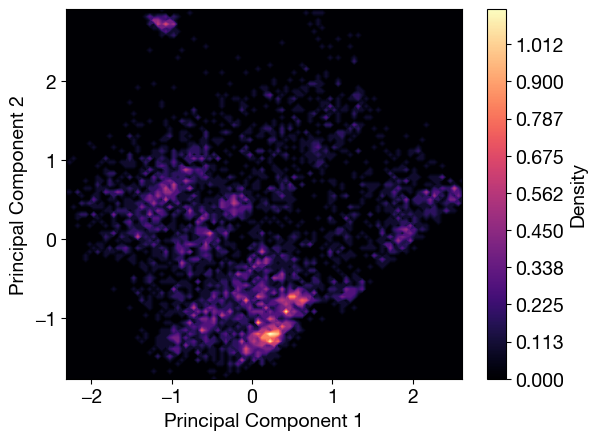

In [22]:
# Set up a 2D histogram with 100 bins
hist, xedges, yedges = np.histogram2d(transformed_data[:, 0], transformed_data[:, 1], density=True, bins=100)

# Transpose the histogram data to prepare for contour plot
z = hist.T

# Set all negative and zero values to a small positive value
z = np.clip(z, 1e-6, None)

# Generate the contour plot
contour = plt.contourf(xedges[:-1], yedges[:-1], z, cmap='magma',levels=1000)

# Add a colorbar to the plot
cbar = plt.colorbar(contour)
cbar.set_label('Density')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_dens_original.png', dpi=300)

DATA FILE OF NEW ENSEMBLE

In [23]:
input_file = "./REST_from_allcoil/0/angles_data.dat"

In [24]:
# Load the data from the file into a NumPy array
data = np.loadtxt(input_file)

# To account for the circular statistics of angular variables, a transformation from 
# the space of dihedral angles {phi(n)} to the metric coordinate space {x(n)=cos phi(n),y(n)=sin phi(n)}
# is performed ()
metric_data = np.column_stack((np.cos(data), np.sin(data)))

In [25]:
# Get the transformed data
transformed_data_2 = pca.transform(metric_data) 

# Save the transformed data to a .dat file with columns separated by tabs and 3 decimal places of precision
np.savetxt('transformed_data_2.dat', transformed_data, delimiter='\t', fmt='%.3f')

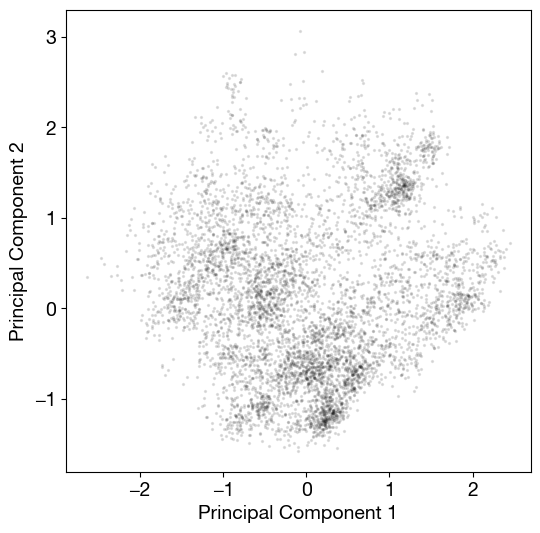

In [26]:
fig = plt.figure(figsize=(6, 6), facecolor='w')

# Plot the data points with respect to the first two principal components
plt.scatter(transformed_data_2[:, 0], transformed_data_2[:, 1], s=2, alpha=0.1, c='black')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_from_coil.png', dpi=300)

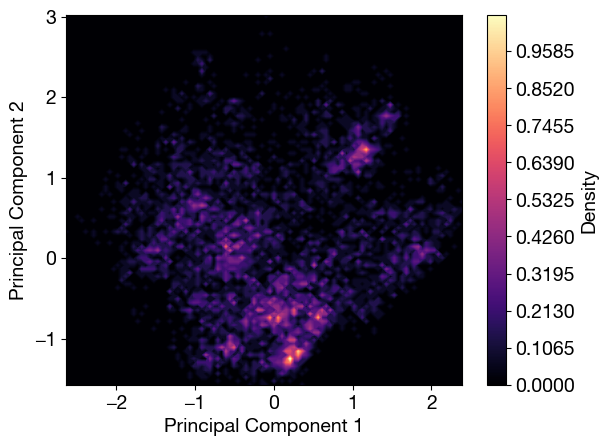

In [27]:
# Set up a 2D histogram with 100 bins
hist, xedges, yedges = np.histogram2d(transformed_data_2[:, 0], transformed_data_2[:, 1], density=True, bins=100)

# Transpose the histogram data to prepare for contour plot
z = hist.T

# Set all negative and zero values to a small positive value
z = np.clip(z, 1e-6, None)

# Generate the contour plot
contour = plt.contourf(xedges[:-1], yedges[:-1], z, cmap='magma',levels=1000)

# Add a colorbar to the plot
cbar = plt.colorbar(contour)
cbar.set_label('Density')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_dens_from_coil.png', dpi=300)

DATA FILE OF YET ANOTHER ENSEMBLE

In [28]:
input_file = "./REST_allcharged/REST/0/angles_data.dat"

In [29]:
# Load the data from the file into a NumPy array
data = np.loadtxt(input_file)

# To account for the circular statistics of angular variables, a transformation from 
# the space of dihedral angles {phi(n)} to the metric coordinate space {x(n)=cos phi(n),y(n)=sin phi(n)}
# is performed ()
metric_data = np.column_stack((np.cos(data), np.sin(data)))

In [30]:
# Get the transformed data
transformed_data_3 = pca.transform(metric_data)

# Save the transformed data to a .dat file with columns separated by tabs and 3 decimal places of precision
np.savetxt('transformed_data_3.dat', transformed_data, delimiter='\t', fmt='%.3f')

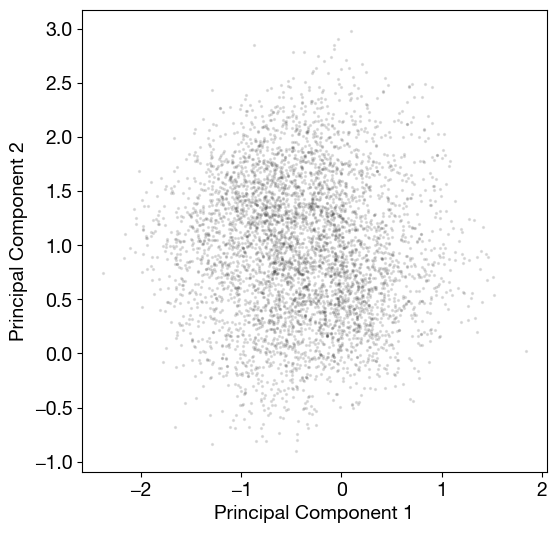

In [31]:
fig = plt.figure(figsize=(6, 6), facecolor='w')

# Plot the data points with respect to the first two principal components
plt.scatter(transformed_data_3[:, 0], transformed_data_3[:, 1], s=2, alpha=0.1, c='black')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_allcharged.png', dpi=300)

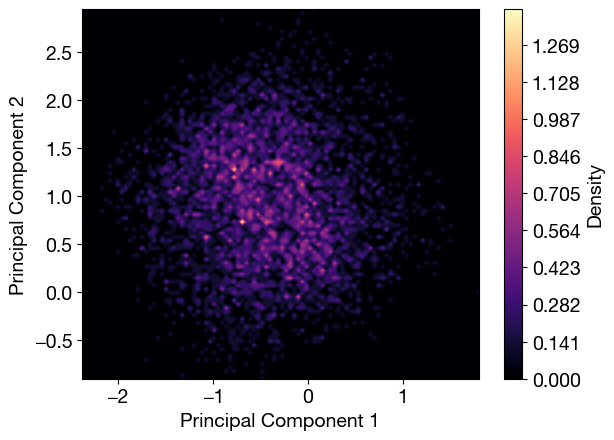

In [32]:
# Set up a 2D histogram with 100 bins
hist, xedges, yedges = np.histogram2d(transformed_data_3[:, 0], transformed_data_3[:, 1], density=True, bins=100)

# Transpose the histogram data to prepare for contour plot
z = hist.T

# Set all negative and zero values to a small positive value
z = np.clip(z, 1e-6, None)

# Generate the contour plot
contour = plt.contourf(xedges[:-1], yedges[:-1], z, cmap='magma',levels=1000)

# Add a colorbar to the plot
cbar = plt.colorbar(contour)
cbar.set_label('Density')

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the plot to a file at 300 DPI
plt.savefig('pca_dens_allcharged.png', dpi=300)